## Imports

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
import pandas as pd
import numpy as np
import h5py
import json

## File paths

In [2]:
filename_overhang = 'data_mammoth/bae8f52c-407e-5f89-a8e3-61fcca51ee0a_raw.h5'
filename_traverse = 'data_mammoth/e897d166-1618-5bd3-ba3a-cb7577c64647_raw.h5'
filename_vertical = 'data_mammoth/40587108-e1a8-56ae-8c7f-1853f009b7c6_raw.h5'

## Functions use

In [3]:
def conver_df(filename):
    df = []
    with h5py.File(filename, "r") as f:
        columns = list(f.keys())
        for c in tqdm(columns):
            df.append(list(f[c]))

    df = pd.DataFrame(df).T
    df.columns = columns
    return df

def clean_df(df):
    data = []
    for j, (r,l) in enumerate(tqdm(list(zip(list(dict(df['acc_RH']).values()), list(dict(df['acc_LH']).values()))))):
        if r is not None:
            data.append([r[0], r[1], r[2], r[3], l[1], l[2], l[3]])
    data = pd.DataFrame(data)
    data.columns = ['Time Step', 'Right AP', 'Right UR', 'Right DP', 'Left AP', 'Left UR', 'Left DP']
    return data

## Load data

In [4]:
#df_overhang = clean_df(conver_df(filename_overhang))
df_traverse = clean_df(conver_df(filename_traverse))
#df_aux = conver_df(filename_traverse)
#df_vertical = clean_df(conver_df(filename_vertical))

### Overhang

NameError: name 'df_overhang' is not defined

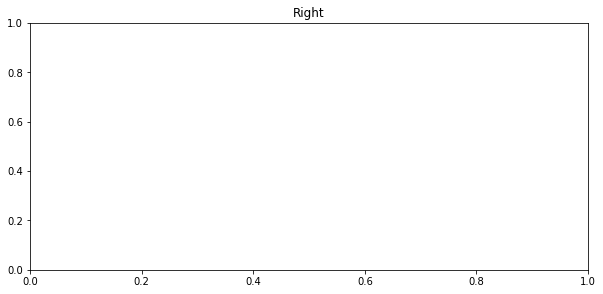

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Right')
plt.plot(df_overhang['Right AP'], label='AP')
plt.plot(df_overhang['Right UR'], label='UR')
plt.plot(df_overhang['Right DP'], label='DP')
plt.legend()

plt.subplot(2,1,2)
plt.title('Right')
plt.plot(df_overhang['Left AP'], label='AP')
plt.plot(df_overhang['Left UR'], label='UR')
plt.plot(df_overhang['Left DP'], label='DP')
plt.legend()

### Traverse

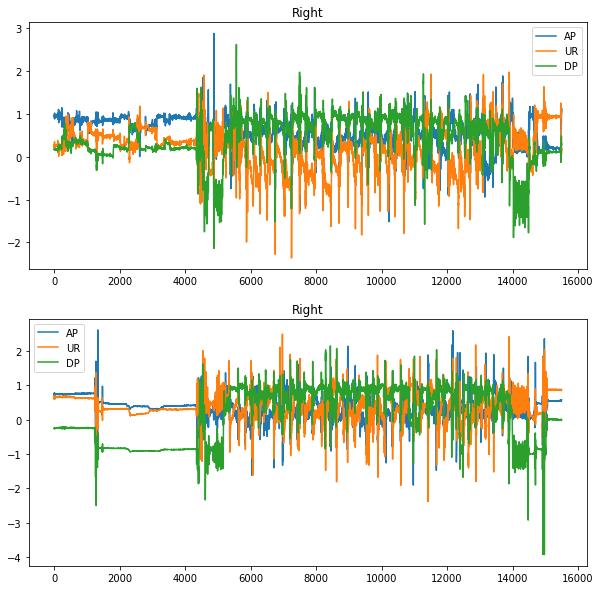

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Right')
plt.plot(df_traverse['Right AP'], label='AP')
plt.plot(df_traverse['Right UR'], label='UR')
plt.plot(df_traverse['Right DP'], label='DP')
plt.legend()

plt.subplot(2,1,2)
plt.title('Right')
plt.plot(df_traverse['Left AP'], label='AP')
plt.plot(df_traverse['Left UR'], label='UR')
plt.plot(df_traverse['Left DP'], label='DP')
plt.legend()

### Vertical

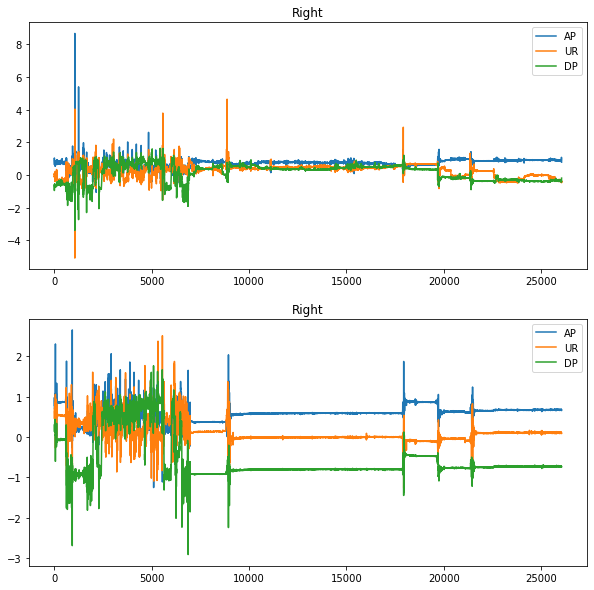

In [143]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Right')
plt.plot(df_vertical['Right AP'], label='AP')
plt.plot(df_vertical['Right UR'], label='UR')
plt.plot(df_vertical['Right DP'], label='DP')
plt.legend()

plt.subplot(2,1,2)
plt.title('Right')
plt.plot(df_vertical['Left AP'], label='AP')
plt.plot(df_vertical['Left UR'], label='UR')
plt.plot(df_vertical['Left DP'], label='DP')
plt.legend()

### Load json

In [7]:
# JSON file 
f = open ('datasets/traverse.json', "r") 
  
# Reading from file 
data = json.loads(f.read()) 

In [8]:
position = []
for d in data:
    aux = d['keypoints']
    p = [None, None, None, None]
    for a in aux:
        if a['part'] == 'leftShoulder':
            p[0] = [a['position']['x'], a['position']['y']]
        elif a['part'] == 'rightShoulder':
            p[1] = [a['position']['x'], a['position']['y']]
        elif a['part'] == 'leftWrist':
            p[2] = [a['position']['x'], a['position']['y']]
        elif a['part'] == 'rightWrist':
            p[3] = [a['position']['x'], a['position']['y']]
    position.append(p.copy())

In [9]:
df = pd.DataFrame(position, columns=['leftShoulder', 'rightShoulder', 'leftWrist', 'rightWrist'])
df

,leftShoulder,rightShoulder,leftWrist,rightWrist
0,"[157.35390267721036, 353.23655666674404]","[182.3546767816311, 351.9255302168462]","[151.63526581554876, 389.9776616769595]","[193.1688262195122, 381.44303506338224]"
1,"[157.35390267721036, 353.23655666674404]","[182.3546767816311, 351.9255302168462]","[151.63526581554876, 389.9776616769595]","[193.1688262195122, 381.44303506338224]"
2,"[157.35390267721036, 353.23655666674404]","[182.3546767816311, 351.9255302168462]","[151.63526581554876, 389.9776616769595]","[193.1688262195122, 381.44303506338224]"
3,"[157.35390267721036, 353.23655666674404]","[182.3546767816311, 351.9255302168462]","[151.63526581554876, 389.9776616769595]","[193.1688262195122, 381.44303506338224]"
4,"[157.35390267721036, 353.23655666674404]","[182.3546767816311, 351.9255302168462]","[151.63526581554876, 389.9776616769595]","[193.1688262195122, 381.44303506338224]"
...,...,...,...,...
359,"[192.3649783250762, 337.4559901153882]","[161.9870069550305, 339.7484792904903]","[194.5670225562119, 363.2871645152303]","[162.65403189310214, 362.37040086947434]"
360,"[190.73073968654725, 333.4946513976597]","[161.92604623189786, 335.17209773750926]","[203.2584288062119, 380.4574672931371]","[157.37821253334604, 357.59311008311664]"
361,"[198.20907964939025, 328.8507448284268]","[165.252998165968, 331.33242303584694]","[197.1321217606707, 368.98312273634843]","[153.60519781345275, 378.27257194348994]"
362,"[198.2731219035823, 330.2203425369149]","[165.8114102991616, 332.670072785104]","[197.022392459032, 366.50843500417903]","[154.80069788490854, 379.57220540606426]"


In [10]:
df1 = pd.concat([pd.DataFrame(df[c].values.tolist()) for c in df.columns], 
                 axis=1, 
                 keys=df.columns)
df1.columns = ['{}{}'.format(i, j) for i, j in df1.columns]

col = df1.loc[: , ["leftShoulder0","rightShoulder0"]]
df1['shoulder0'] = col.mean(axis=1)
col = df1.loc[: , ["leftShoulder1","rightShoulder1"]]
df1['shoulder1'] = col.mean(axis=1)

left_wrist_norm0 = df1.loc[:, 'leftWrist0'] - df1.loc[: , 'shoulder0']
right_wrist_norm0 = df1.loc[:, 'rightWrist0'] - df1.loc[: , 'shoulder0']
left_wrist_norm1 = df1.loc[:, 'leftWrist1'] - df1.loc[: , 'shoulder1']
right_wrist_norm1 = df1.loc[:, 'rightWrist1'] - df1.loc[: , 'shoulder1']

df1['lwn0'] = left_wrist_norm0
df1['rwn0'] = right_wrist_norm0
df1['lwn1'] = left_wrist_norm1
df1['rwn1'] = right_wrist_norm1

df1[['lwn0', 'lwn1']]

,lwn0,lwn1
0,-18.219024,37.396618
1,-18.219024,37.396618
2,-18.219024,37.396618
3,-18.219024,37.396618
4,-18.219024,37.396618
...,...,...
359,17.391030,24.684930
360,26.930036,46.124093
361,15.401083,38.891539
362,14.980126,35.063227


In [11]:
df_traverse_ = df_traverse[np.array(list(df_traverse.index)) % 43 == 0]

In [12]:
ace = []

for i in dict(df_traverse_[['Right AP', 'Right UR', 'Right DP']]).values():
    ace.append(list(i))
    
ace2 = []
for j, i in enumerate(dict(df_traverse_[['Left AP', 'Left UR', 'Left DP']]).values()):
    ace[j] = ace[j] + list(i)
    
ace = ace + ace2
    
p = []
for j in dict(df1[['rwn0', 'rwn1']]).values():
    p.append(list(j)[:361])

p2 = []
for z, j in enumerate(dict(df1[['lwn0', 'lwn1']]).values()):
    p[z] = p[z] + list(j)[:361]

In [13]:
x = np.array(ace + p)
x = x[:, :721]
x.shape

(5, 721)

In [14]:
y = np.array(p)[:, 1:]
y.shape

(2, 721)

In [21]:
class predictor_hand():
    
    def __init__(self, max_iter=1000, tol=1e-3):
        self.reg = make_pipeline(StandardScaler(),
                                 SGDRegressor(max_iter=max_iter, tol=tol))
    
        self.reg2 = make_pipeline(StandardScaler(),
                                  SGDRegressor(max_iter=max_iter, tol=tol))
    
    def fit(self, x, y):
        self.reg.fit(x, y[0, :])

        self.reg2.fit(x, y[1, :])

        print("Absolute error x: {} y: {}".format(np.mean(y[1, :] - self.reg2.predict(x)),
               np.mean(y[0, :] - self.reg.predict(x))))
        
    def predict(self, x):
        return np.array([self.reg.predict(x), self.reg2.predict(x)]).T

       

In [25]:
model = predictor_hand()
model.fit(x.T, y)
prediction = model.predict(x.T)

Absolute error x: 0.2351951186832079 y: 0.044217930777838345


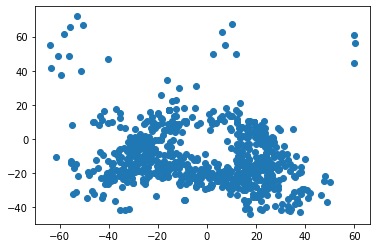

In [26]:
plt.scatter(prediction[:, 0], prediction[:, 1])

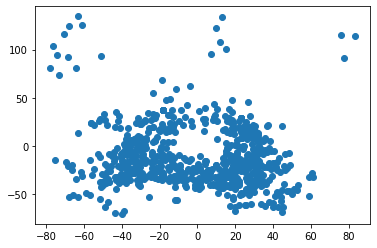

In [27]:
plt.scatter(y.T[:, 0], y.T[:, 1])

In [34]:
x.T[:, 3:][1]

array([23.31453649, 28.86199162])

In [35]:
 y.T[0]

array([23.31453649, 28.86199162])

In [47]:
x.T[:, 3:][:10]

array([[23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [37.03445062, 21.1387807 ],
       [34.67290367,  5.57514199],
       [35.34755055,  5.90882563]])

In [40]:
y.T[:10]

array([[23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [23.31453649, 28.86199162],
       [37.03445062, 21.1387807 ],
       [34.67290367,  5.57514199],
       [35.34755055,  5.90882563],
       [28.67781476,  2.29724865]])

In [62]:
# Positive delta -> moving on the right
# Negative delta -> moving on the left 
delta_pos = y.T - x.T[:, 3:]

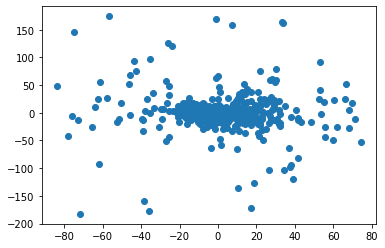

In [63]:
plt.scatter(delta_pos[:,0], delta_pos[:,1])

In [123]:
# 0 -> up
# 1 -> right
# 2 -> down
# 3 -> left
direction = np.array([0 if (delta_pos[i,0] < delta_pos[i,1] and -delta_pos[i,0] < delta_pos[i,1])
                      else 1 if (delta_pos[i,0] > delta_pos[i,1] and -delta_pos[i,0] < delta_pos[i,1])
                      else 2 if (delta_pos[i,0] > delta_pos[i,1] and delta_pos[i,0] < -delta_pos[i,1])
                      else 3 for i in range(len(delta_pos))])

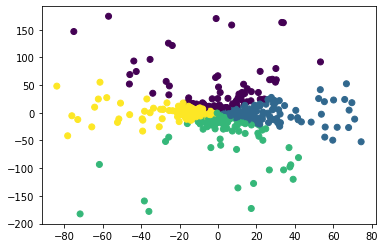

In [124]:
plt.scatter(delta_pos[:,0], delta_pos[:,1], c = direction)